### Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from collections import Counter
from xml.etree import ElementTree as ET
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('data/Final_merged_dataset_clean.csv')

In [3]:
df.shape, df.columns.values

((13297, 96),
 array(['id', 'home_team_api_id', 'away_team_api_id', 'crossing_h',
        'finishing_h', 'heading_accuracy_h', 'short_passing_h',
        'volleys_h', 'dribbling_h', 'curve_h', 'free_kick_accuracy_h',
        'long_passing_h', 'ball_control_h', 'acceleration_h',
        'sprint_speed_h', 'agility_h', 'reactions_h', 'balance_h',
        'shot_power_h', 'jumping_h', 'stamina_h', 'strength_h',
        'long_shots_h', 'aggression_h', 'interceptions_h', 'positioning_h',
        'vision_h', 'penalties_h', 'marking_h', 'standing_tackle_h',
        'sliding_tackle_h', 'gk_diving_h', 'gk_handling_h', 'gk_kicking_h',
        'gk_positioning_h', 'gk_reflexes_h', 'crossing_a', 'finishing_a',
        'heading_accuracy_a', 'short_passing_a', 'volleys_a',
        'dribbling_a', 'curve_a', 'free_kick_accuracy_a', 'long_passing_a',
        'ball_control_a', 'acceleration_a', 'sprint_speed_a', 'agility_a',
        'reactions_a', 'balance_a', 'shot_power_a', 'jumping_a',
        'stamina_

In [4]:
df.head(5)

,id,home_team_api_id,away_team_api_id,crossing_h,finishing_h,heading_accuracy_h,short_passing_h,volleys_h,dribbling_h,curve_h,...,defenceAggression_h,defenceTeamWidth_h,buildUpPlaySpeed_a,buildUpPlayPassing_a,chanceCreationPassing_a,chanceCreationCrossing_a,chanceCreationShooting_a,defencePressure_a,defenceAggression_a,defenceTeamWidth_a
0,1729,10260,10261,81.0,72.0,81.0,81.0,79.0,79.0,79.0,...,48.000000,54.833333,58.166667,55.333333,53.500000,57.333333,49.833333,46.666667,48.333333,48.333333
1,1730,9825,8659,77.0,80.0,90.0,88.0,79.0,79.0,80.0,...,46.500000,50.500000,57.500000,51.500000,53.000000,56.000000,54.666667,43.000000,45.666667,54.833333
2,1731,8472,8650,79.0,66.0,78.0,82.0,69.0,80.0,78.0,...,52.166667,51.833333,57.666667,44.333333,41.333333,47.833333,57.333333,51.000000,52.500000,56.000000
3,1732,8654,8528,81.0,71.0,77.0,87.0,69.0,81.0,80.0,...,42.833333,40.166667,47.166667,50.666667,52.666667,55.500000,45.500000,50.000000,54.000000,46.000000
4,1734,8668,8655,74.0,80.0,74.0,83.0,77.0,80.0,78.0,...,57.500000,56.333333,52.500000,63.833333,57.000000,56.000000,42.000000,45.666667,55.000000,46.666667


In [ ]:
### get dummies, encode for string values
#### eploratory (minimu, maybe some plots)

### heatmap of correlations, potentially reduce features
### Guided capstone (linear regression or logistic 'select  k-best', chart that has a line with vertical lines where error bar)

### one hot encoding 
    ### same as get dummies
### guided capstone for reference, unit 6 (potentially)
### step 3-4

### pipeline?
    #### nutshell object for organizing steps
    #### scale, gridsearch, apply model, make predictions
    ### apply all in pipeline
    ### organizes what im doing 

    
###one notebook for ingesting, merging, maybe preprocessing,
###spit out test, train csvs

####document using markdown cells, useful quirks for self
    
###split before scaling, use scaler for training
#### numerical maybe apply standard scaler as preprocessing scikitlearn

#### Split test-train 
### buildUpPlaySpeedClass



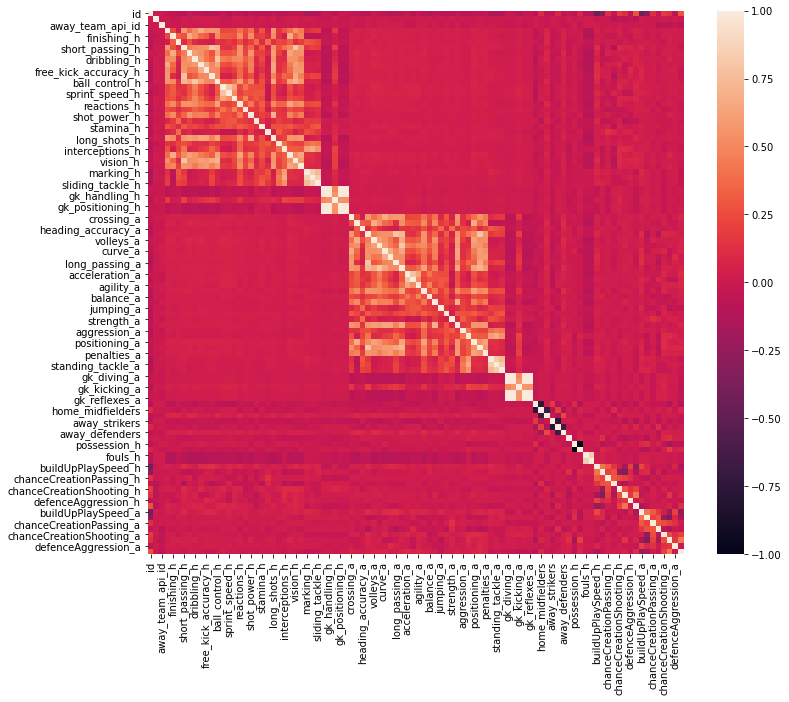

In [6]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

In [11]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y='match_winner', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='match_winner')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [12]:
features = [column for column in df.columns]

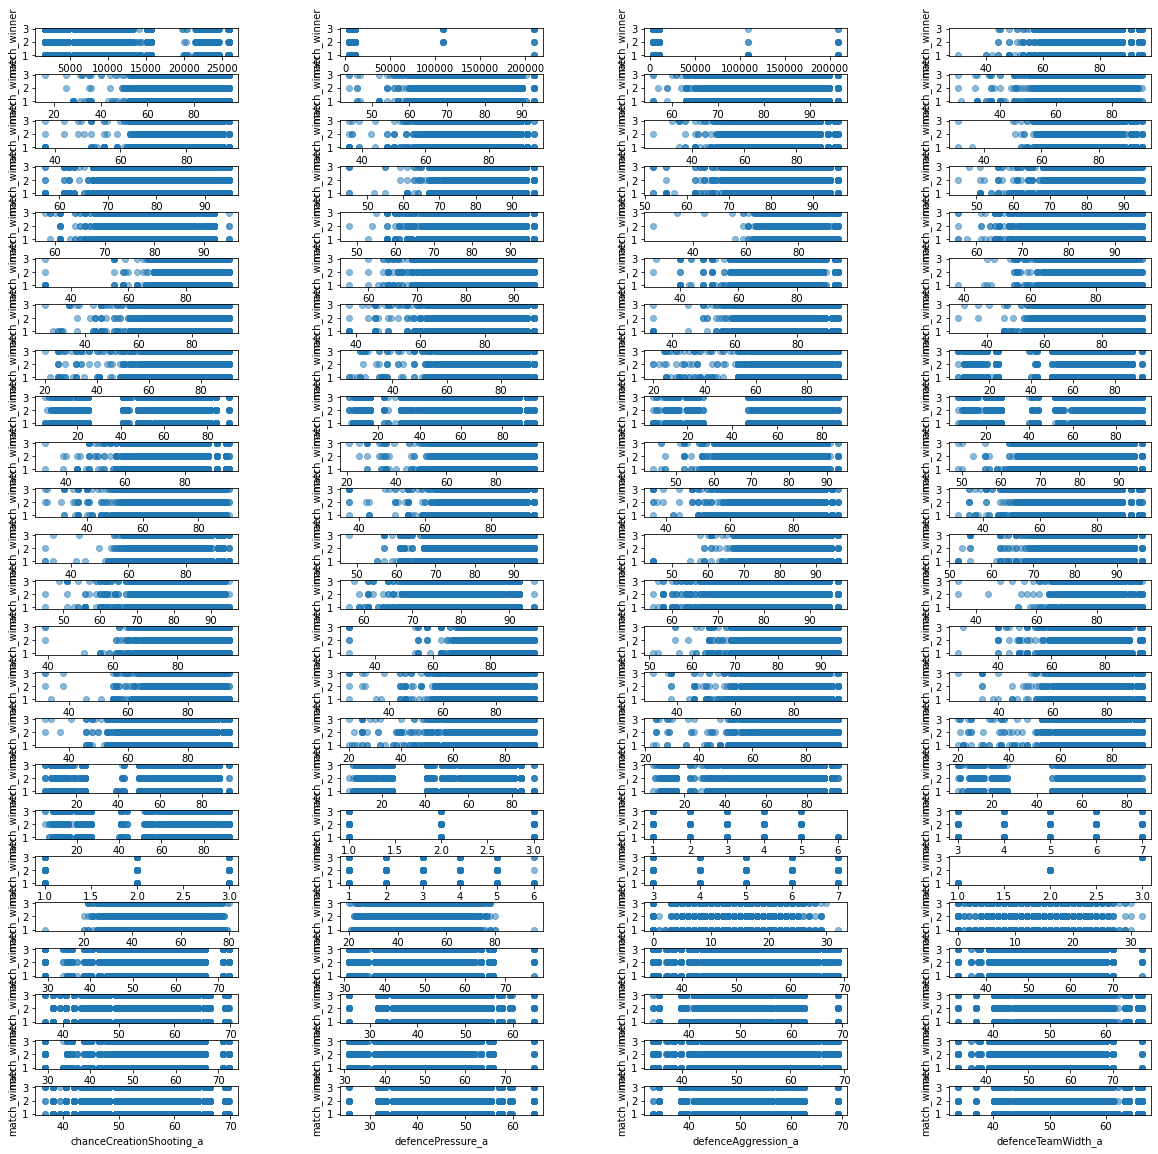

In [15]:
scatterplots(features, ncol=4, figsize=(20, 20))

In [14]:
df.head().T

,0,1,2,3,4
id,1729.000000,1730.000000,1731.000000,1732.0,1734.000000
home_team_api_id,10260.000000,9825.000000,8472.000000,8654.0,8668.000000
away_team_api_id,10261.000000,8659.000000,8650.000000,8528.0,8655.000000
crossing_h,81.000000,77.000000,79.000000,81.0,74.000000
finishing_h,72.000000,80.000000,66.000000,71.0,80.000000
...,...,...,...,...,...
chanceCreationCrossing_a,57.333333,56.000000,47.833333,55.5,56.000000
chanceCreationShooting_a,49.833333,54.666667,57.333333,45.5,42.000000
defencePressure_a,46.666667,43.000000,51.000000,50.0,45.666667
defenceAggression_a,48.333333,45.666667,52.500000,54.0,55.000000


/usr/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
 

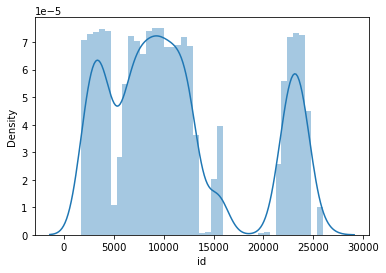

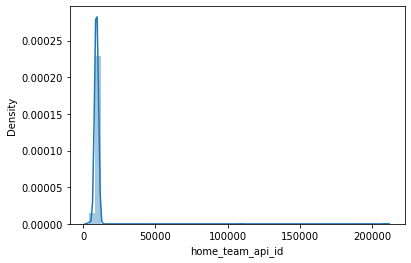

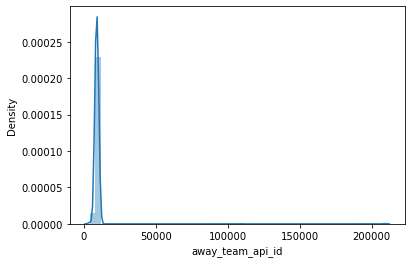

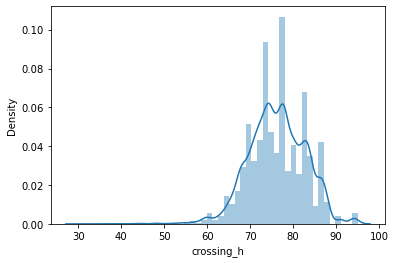

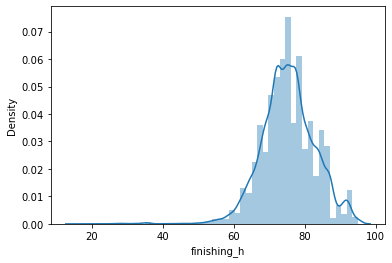

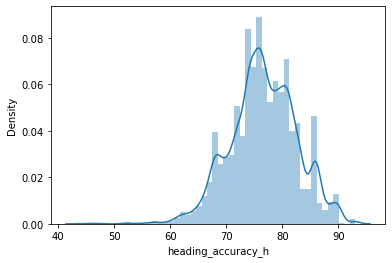

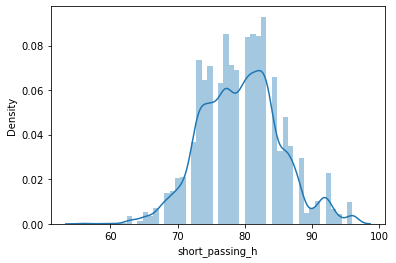

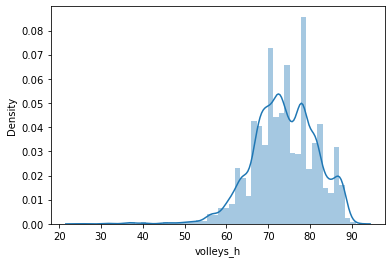

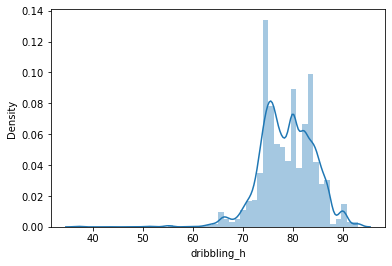

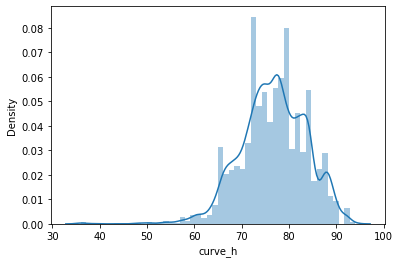

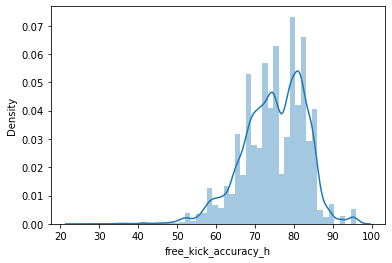

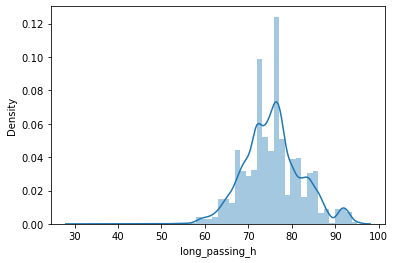

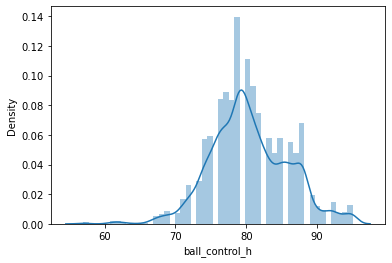

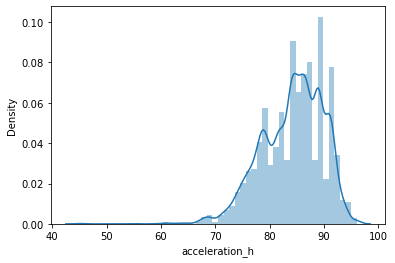

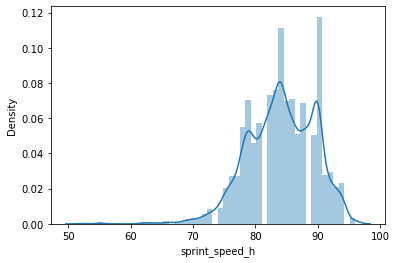

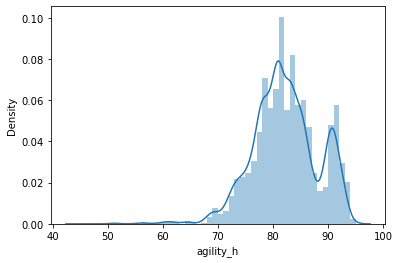

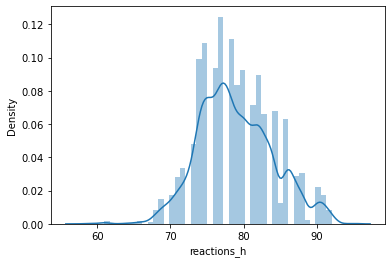

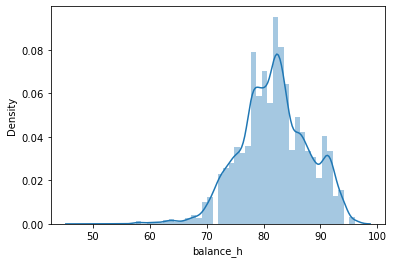

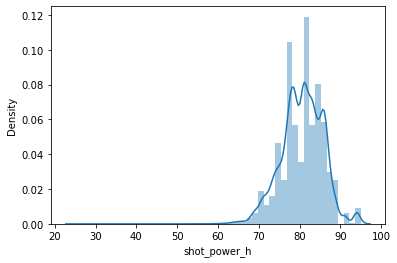

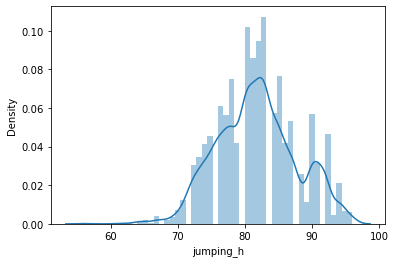

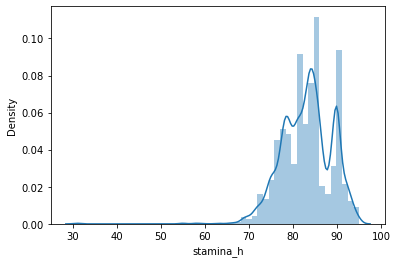

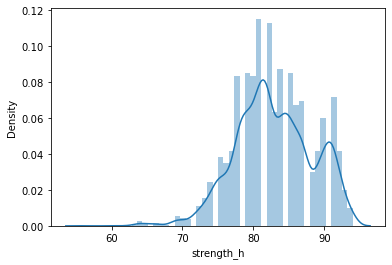

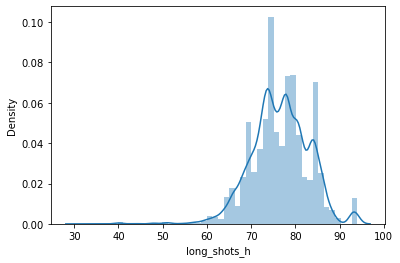

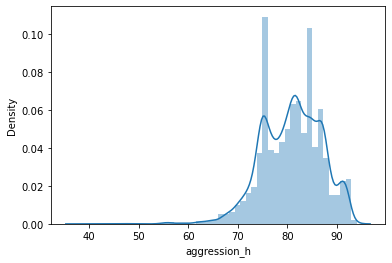

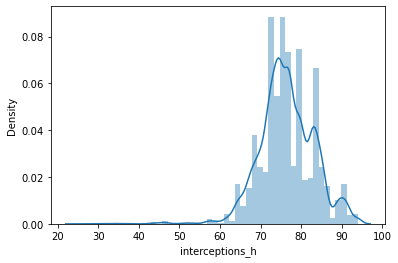

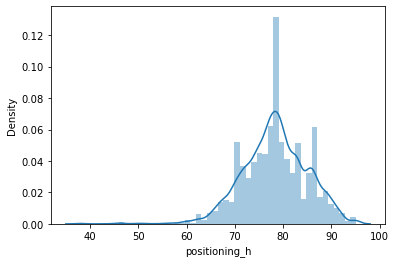

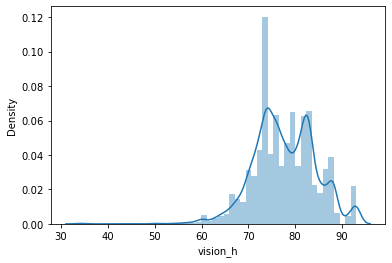

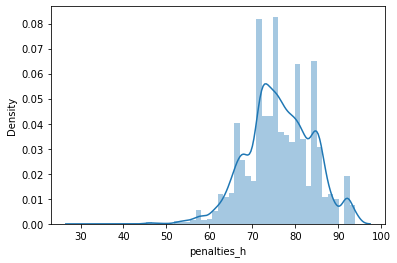

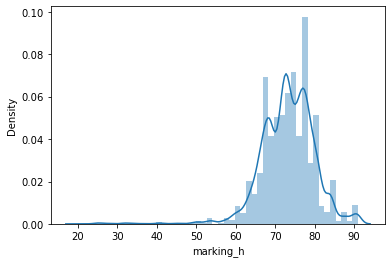

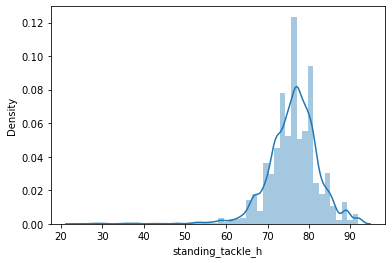

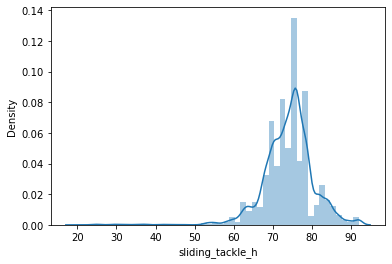

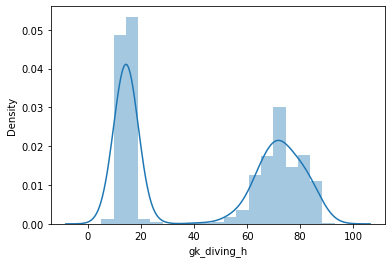

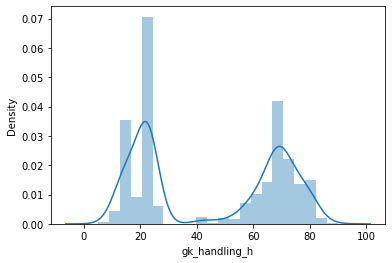

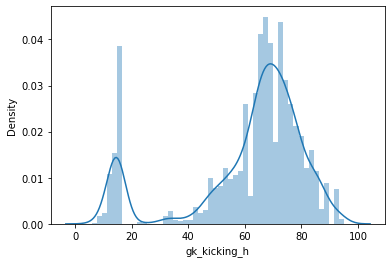

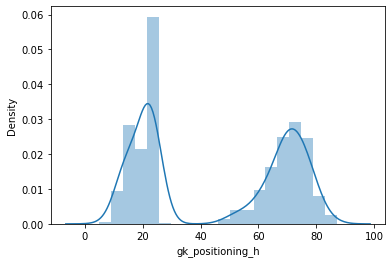

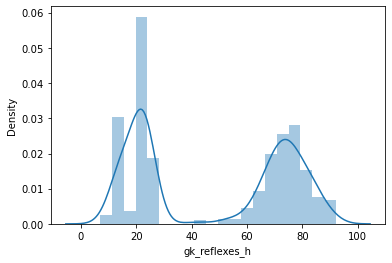

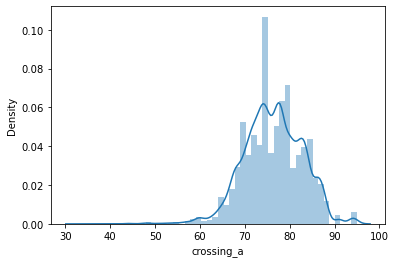

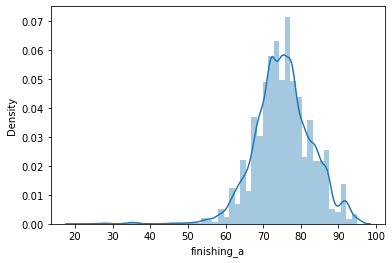

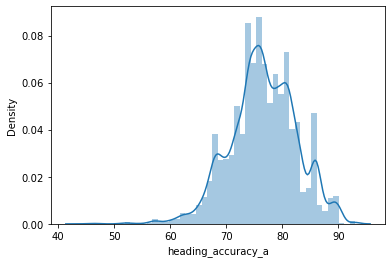

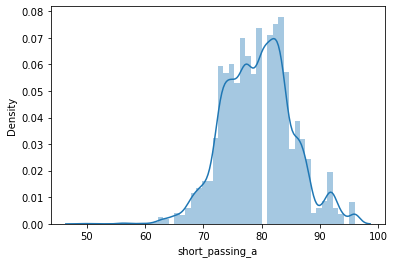

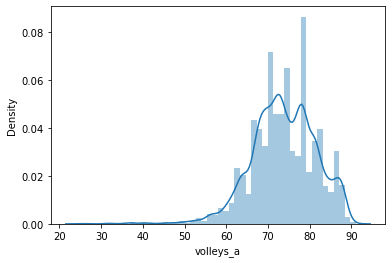

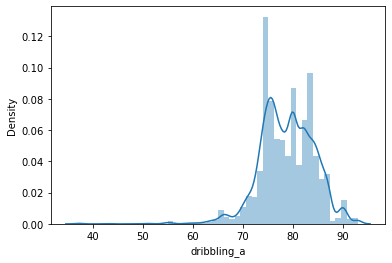

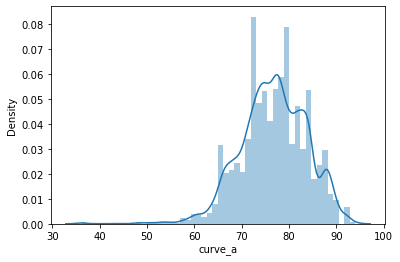

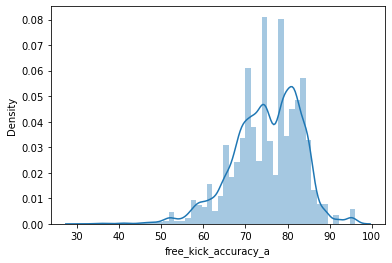

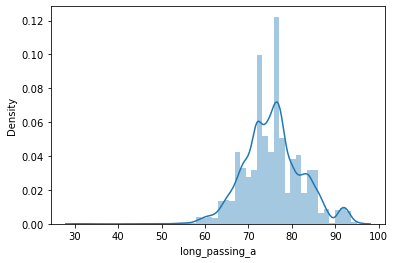

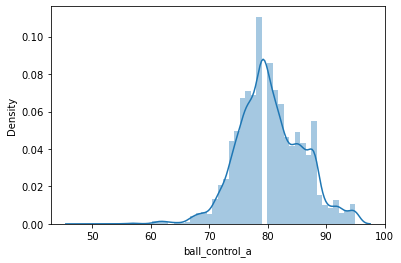

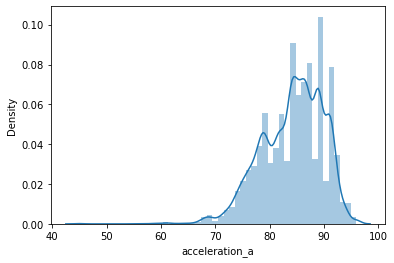

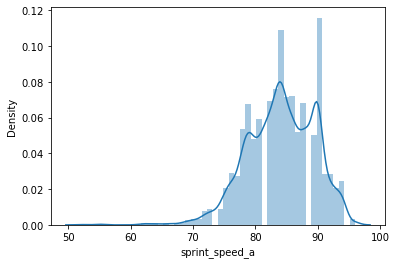

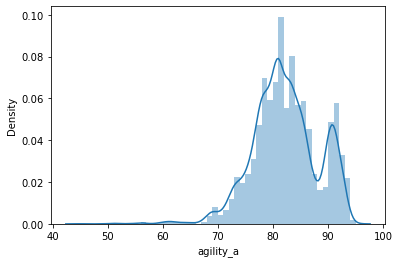

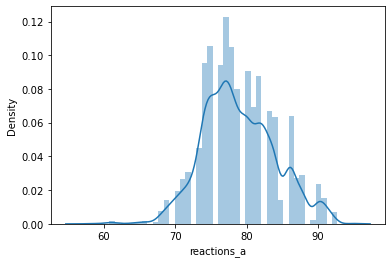

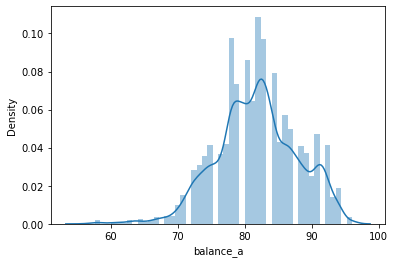

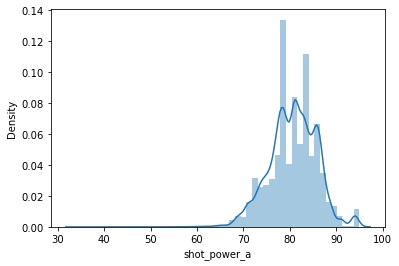

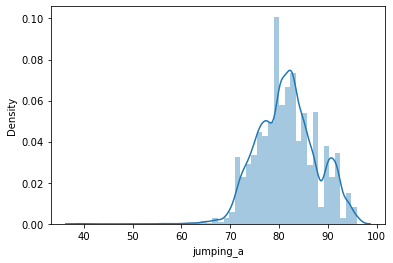

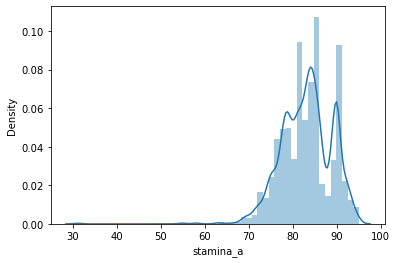

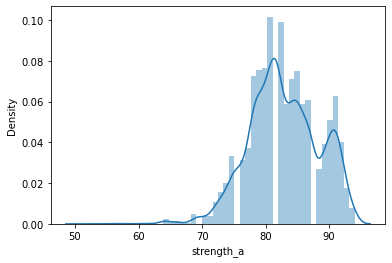

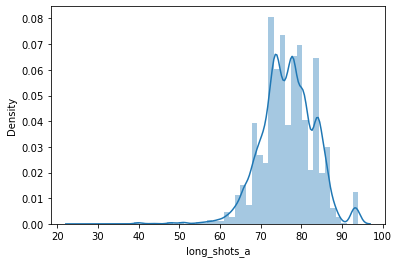

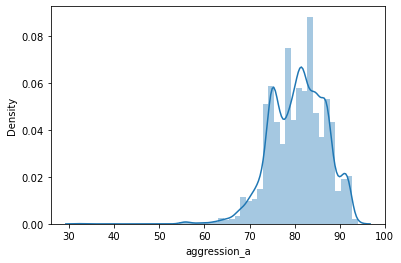

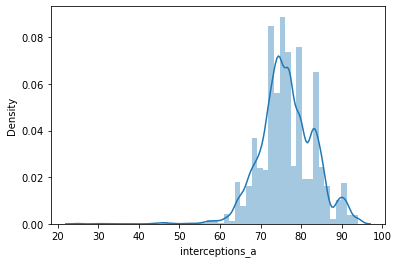

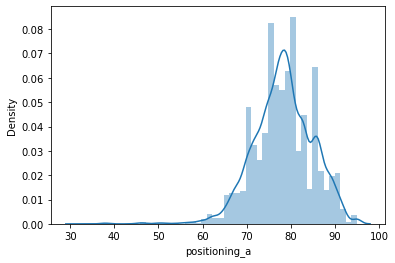

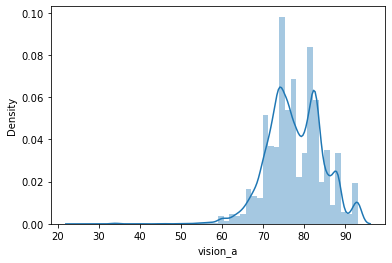

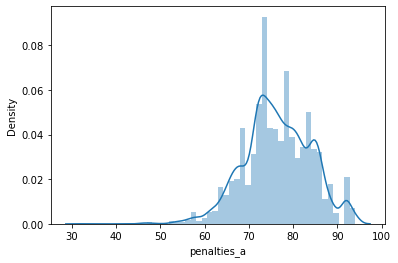

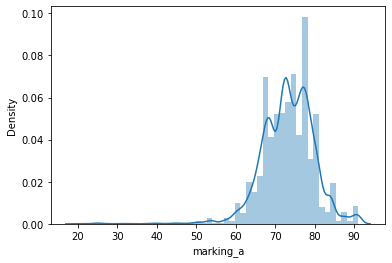

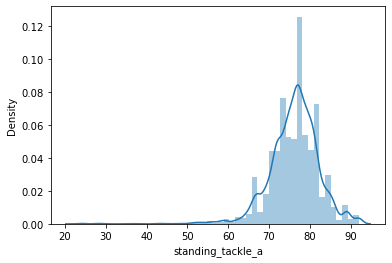

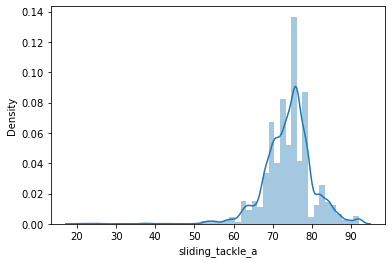

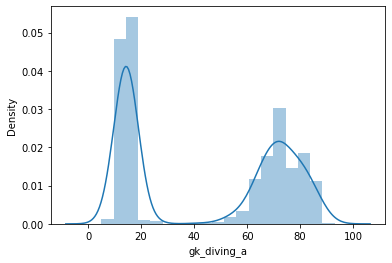

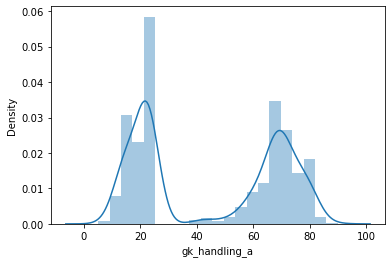

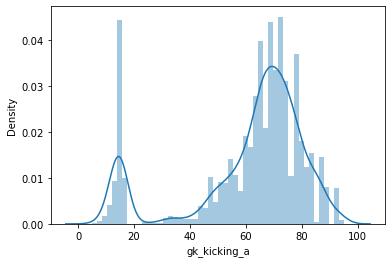

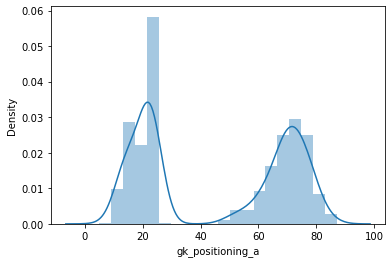

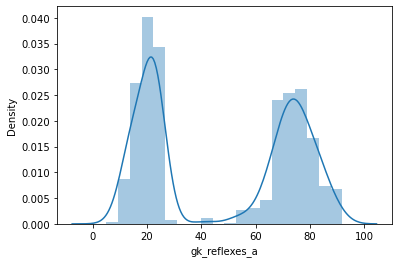

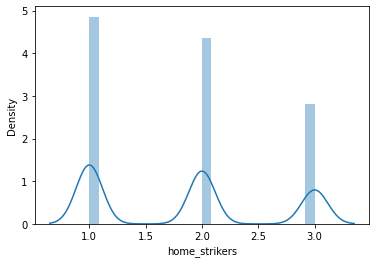

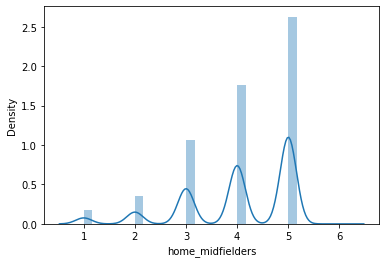

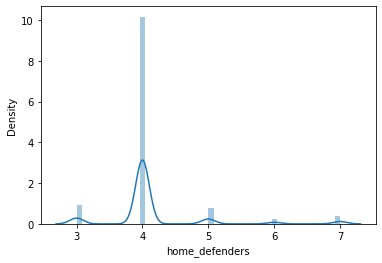

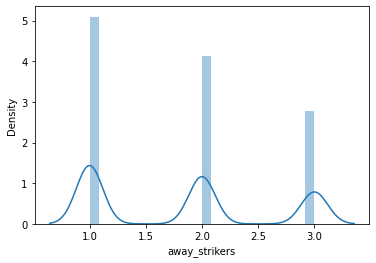

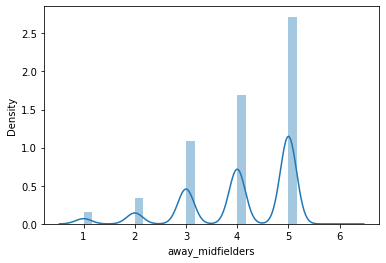

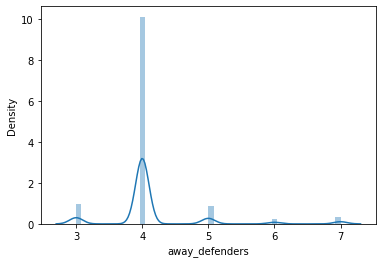

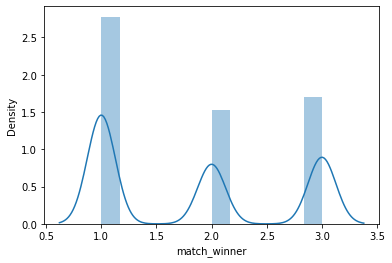

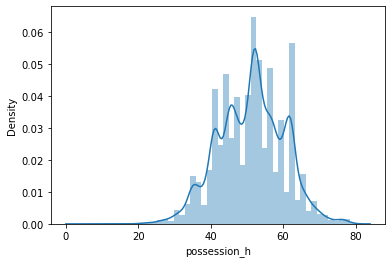

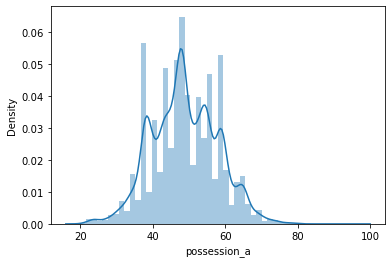

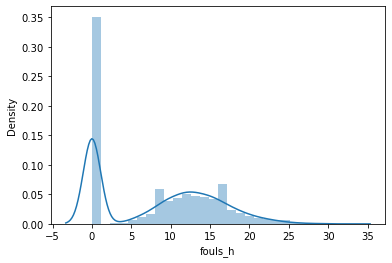

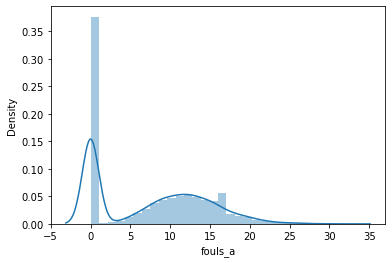

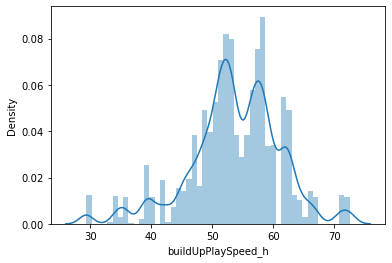

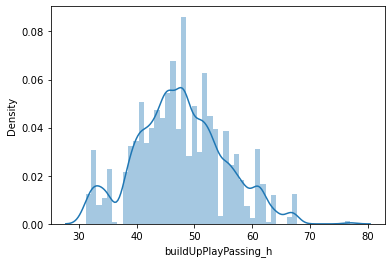

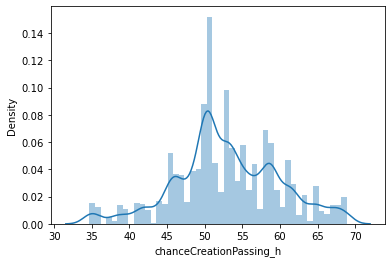

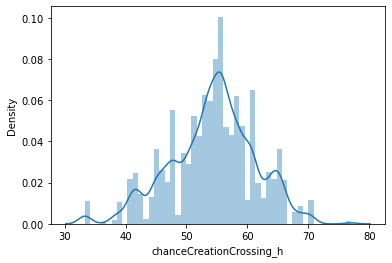

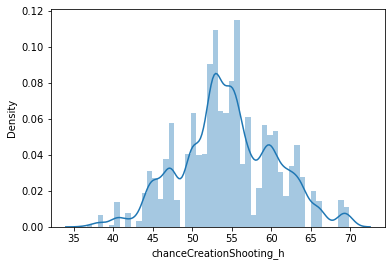

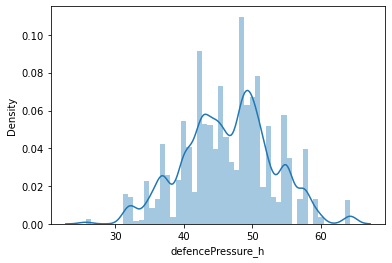

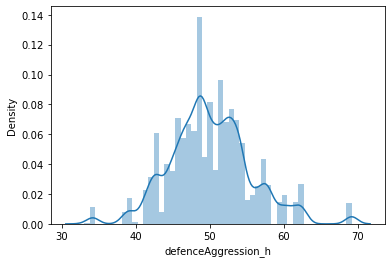

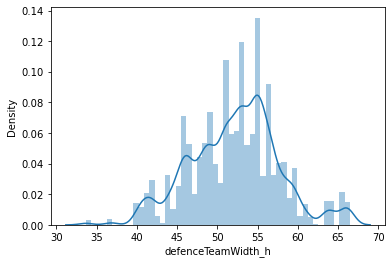

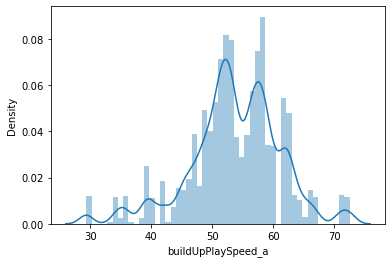

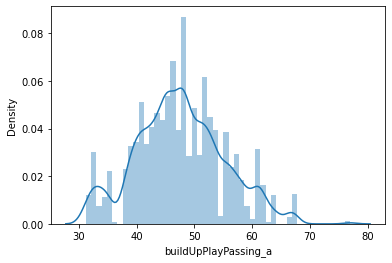

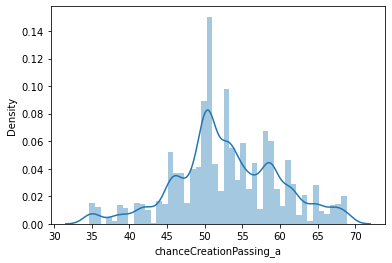

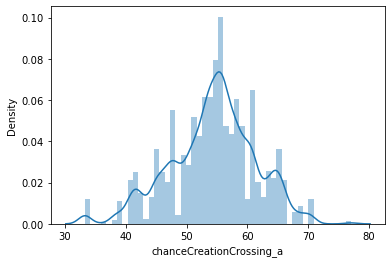

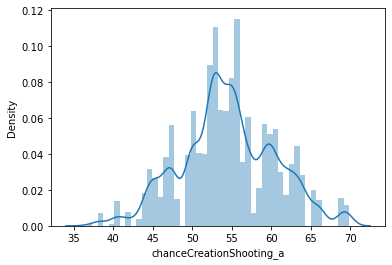

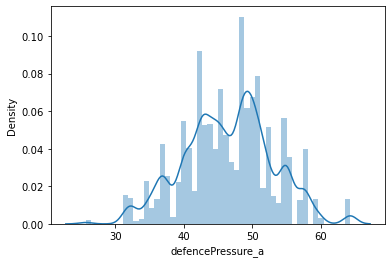

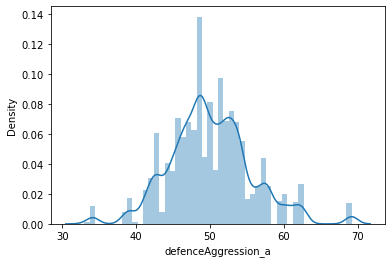

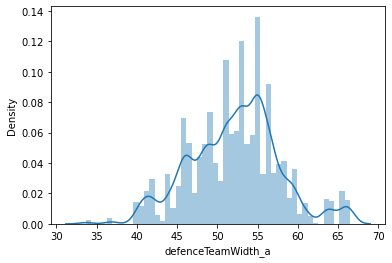

In [26]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

In [ ]:
p[yertp[yert